#  Understanding data

## import library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [6]:
# reading dataset
house=pd.read_csv('C:\\Users\\Vivek\\Downloads\\train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data cleaning

Removing null values in category column

In [9]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    house[col]=house[col].fillna('None')

In [12]:
#Drop the coulmns which are skewed to one one value

def getCategoricalValueCount():
    column=[]
    category_columns=house.select_dtypes(include=['object'])
    for col in(category_columns):
        if(house[col].value_counts().max()>1241):
            column.append(col)
    return column

ColumnsToRemove=getCategoricalValueCount()


house.drop(ColumnsToRemove,axis=1,inplace=True)

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


removing null values in Numeric column

In [13]:
# setting the null values with median values for LotFrontage and MasVnrArea columns

house['LotFrontage'] = house['LotFrontage'].replace(np.nan, house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].median())

In [14]:
# Setting the null values with 0 for GarageYrBlt 

house['GarageYrBlt']=house['GarageYrBlt'].fillna(0)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)

In [16]:
# Create a new column  IsRemodelled - This column would determine whether the house has been remodelled or not 

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house['IsRemodelled'] = house.apply(checkForRemodel, axis=1)
house.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [17]:
# Create a new column named Age to determine the age of the building

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house['Age'] = house.apply(getBuiltOrRemodelAge, axis=1)
house.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,Age
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [18]:
# Create a new column which would indicate if the Garage is old or new.
# old 0 New 1

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house['GarageState'] = house['GarageYrBlt'].apply(getGarageConstructionPeriod)
house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,Age,GarageState
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [19]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns 

house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

Remove numeric skewed data

In [21]:
def getNumericalValueCounts():
    column = []
    numerical_columns = house.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getNumericalValueCounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.drop(['MoSold'], axis = 1, inplace = True)

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,Age,GarageState
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


# checking outlier

In [22]:
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,Age,GarageState
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


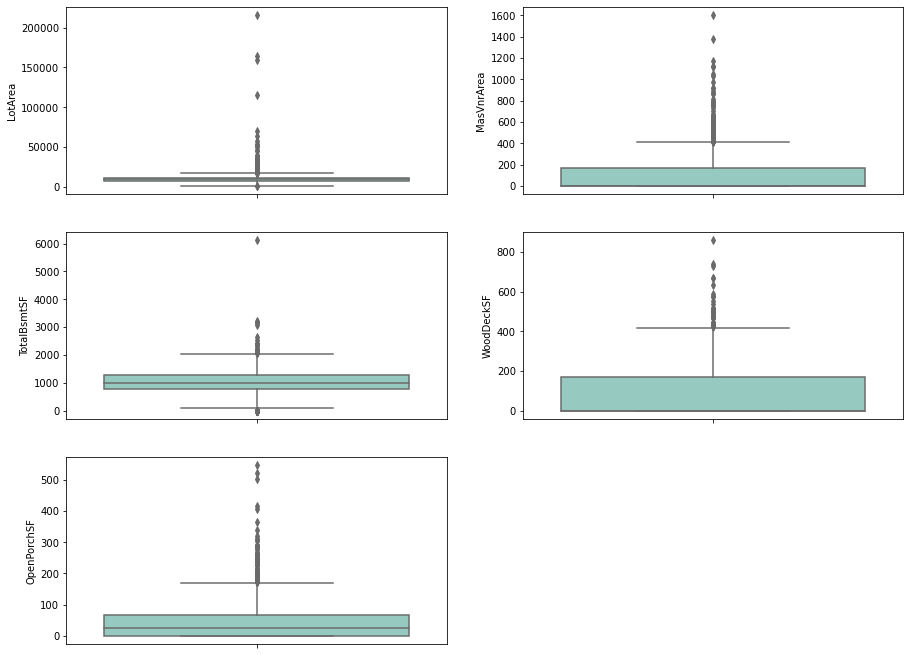

In [26]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(15, 20))
plt.subplot(5,2,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house)
plt.subplot(5,2,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house)
plt.subplot(5,2,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house)
plt.subplot(5,2,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house)
plt.subplot(5,2,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house)
plt.show()

In [27]:
# Removing Outliers



nn_quartile_LotArea = house['LotArea'].quantile(0.98)
house = house[house["LotArea"] < nn_quartile_LotArea]

nn_quartile_MasVnrArea = house['MasVnrArea'].quantile(0.98)
house = house[house["MasVnrArea"] < nn_quartile_MasVnrArea]

nn_quartile_TotalBsmtSF = house['TotalBsmtSF'].quantile(0.99)
house = house[house["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

nn_quartile_WoodDeckSF = house['WoodDeckSF'].quantile(0.99)
house = house[house["WoodDeckSF"] < nn_quartile_WoodDeckSF]

nn_quartile_OpenPorchSF = house['OpenPorchSF'].quantile(0.99)
house = house[house["OpenPorchSF"] < nn_quartile_OpenPorchSF]

# Data Visualization

C:\Users\Vivek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


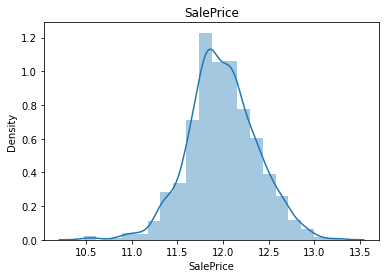

In [28]:
#  target variable -> SalePrice 

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=20)
plt.show()

<Figure size 720x360 with 0 Axes>

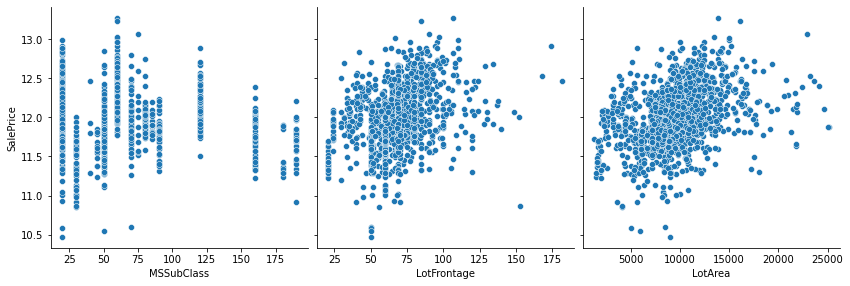

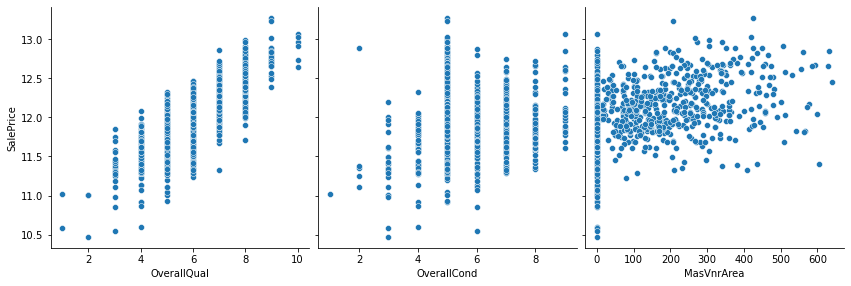

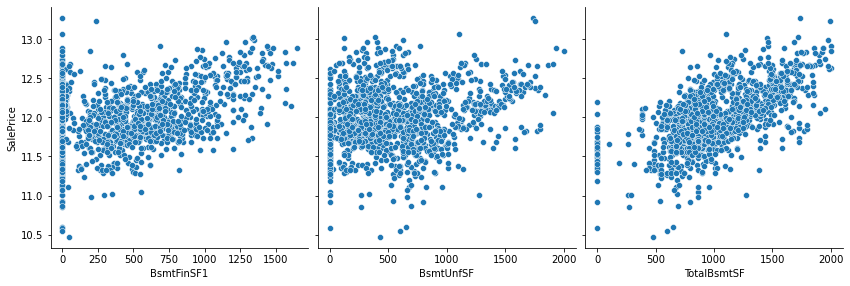

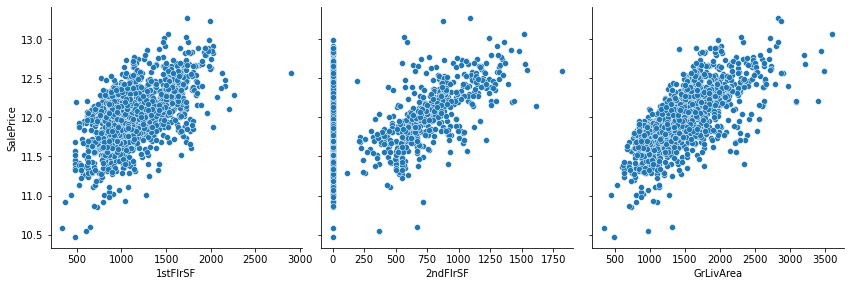

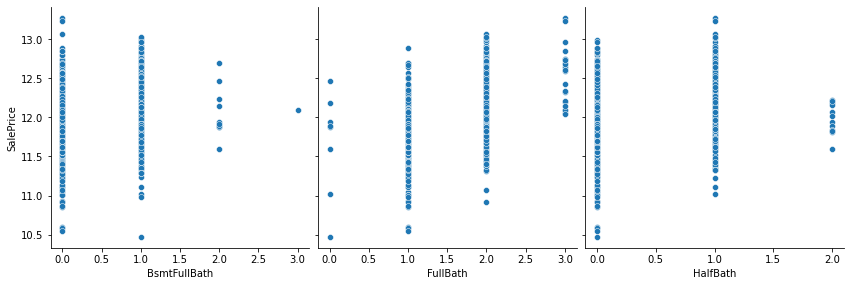

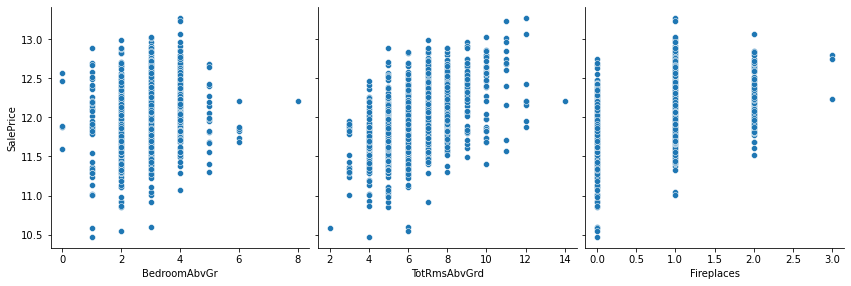

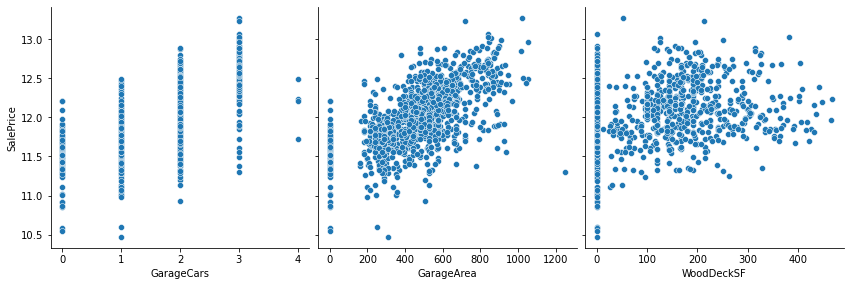

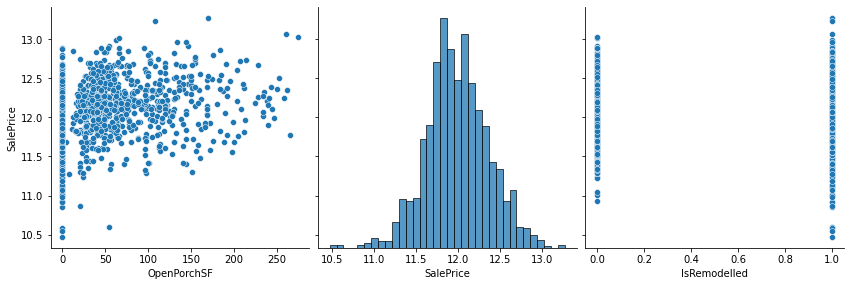

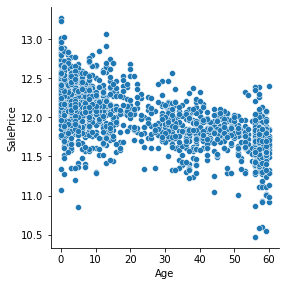

In [32]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['Age'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

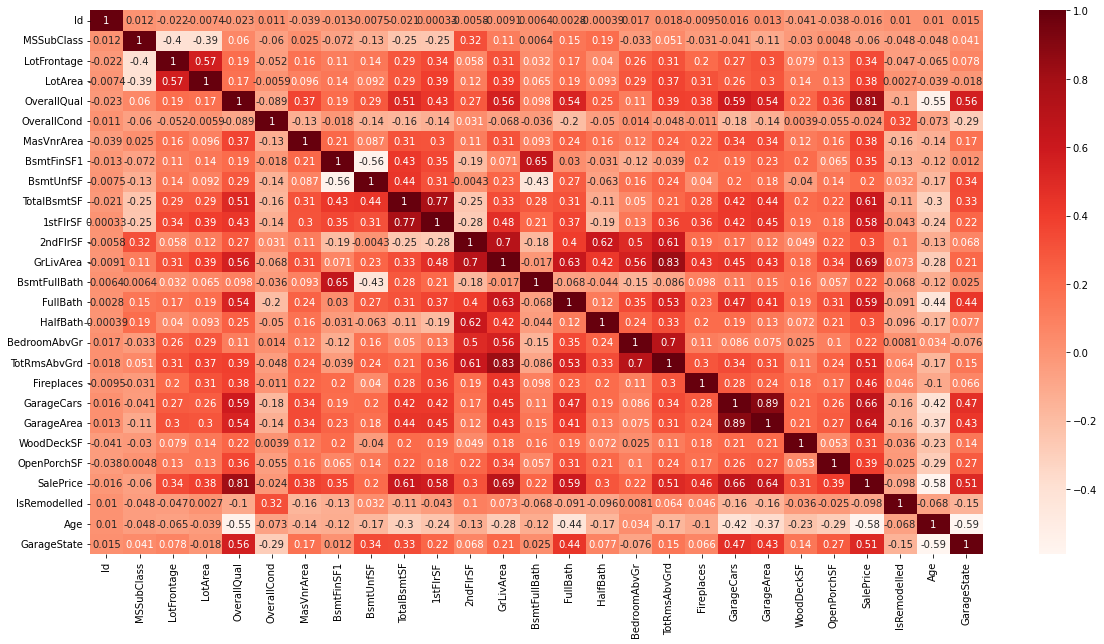

In [36]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="Reds")
plt.show()

remove columns showing high correlation

In [38]:
house.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

# data preperation

Converting categorical data into numercal data

Creating Dummies

In [39]:
house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['d_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['d_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['d_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['d_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [40]:
# drop the old columns from which the new columns were derived


house = house.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [42]:
# For the following columns create dummies


d_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, d_MSZoning], axis = 1)


d_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, d_Neighborhood], axis = 1)


d_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, d_RoofStyle], axis = 1)


d_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, d_Exterior1st], axis = 1)


d_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, d_Exterior2nd], axis = 1)


d_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, d_Foundation], axis = 1)


d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [43]:
# drop the below columns as we now have new columns derived from these columns

house = house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


# Train test and split

In [44]:
# Putting all feature variable to X

X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# Putting response variable to y

y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [46]:
# scaling the features

from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [50]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

RFE

In [55]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Assign the columns selected by RFE to colmns

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,FullBath,True,1
9,HalfBath,True,1


In [57]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [58]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Building and Evaluating Model

Ridge

In [59]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
20,9.0,-0.078008,-0.084074,1
21,10.0,-0.078050,-0.084076,2
19,8.0,-0.077968,-0.084078,3
18,7.0,-0.077927,-0.084084,4
17,6.0,-0.077886,-0.084090,5
16,5.0,-0.077844,-0.084095,6
22,20,-0.078380,-0.084148,7
15,4.0,-0.077807,-0.084150,8
14,3.0,-0.077777,-0.084230,9
13,2.0,-0.077753,-0.084326,10


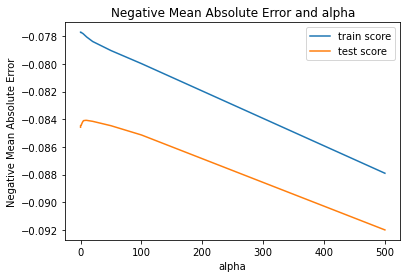

In [61]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [62]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=9.0)

In [83]:
# check the coefficient values with lambda = 10

alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00489209,  0.02265919,  0.06856975,  0.04548494,  0.03282097,
        0.0483126 ,  0.10122171,  0.01194917,  0.01165228,  0.01912558,
        0.02214819,  0.03662631,  0.01039166, -0.01351653, -0.020056  ,
        0.01260477,  0.01363608,  0.01770606,  0.01725692,  0.01638142,
        0.01493021, -0.0143559 ,  0.01468146,  0.0601006 ,  0.02345367,
        0.09132186,  0.0626661 ,  0.02576993, -0.0113843 , -0.0085103 ,
        0.02192487, -0.0147848 , -0.00983069,  0.01714535, -0.00978225,
       -0.01155976, -0.00701566,  0.01195118, -0.03802166, -0.03165379,
        0.00951623, -0.00571198, -0.01679719,  0.02959333,  0.01867805,
        0.02084006,  0.04181594,  0.01854731,  0.00619079, -0.00945001])

In [84]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01365991994414649

In [85]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0049
1,LotArea,0.0227
2,OverallQual,0.0686
3,OverallCond,0.0455
4,BsmtFinSF1,0.0328
5,TotalBsmtSF,0.0483
6,GrLivArea,0.1012
7,BsmtFullBath,0.0119
8,FullBath,0.0117
9,HalfBath,0.0191


In [86]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0049,
 'LotArea': 0.0227,
 'OverallQual': 0.0686,
 'OverallCond': 0.0455,
 'BsmtFinSF1': 0.0328,
 'TotalBsmtSF': 0.0483,
 'GrLivArea': 0.1012,
 'BsmtFullBath': 0.0119,
 'FullBath': 0.0117,
 'HalfBath': 0.0191,
 'Fireplaces': 0.0221,
 'GarageCars': 0.0366,
 'WoodDeckSF': 0.0104,
 'IsRemodelled': -0.0135,
 'Age': -0.0201,
 'GarageState': 0.0126,
 'd_BsmtQual': 0.0136,
 'd_BsmtExposure': 0.0177,
 'd_HeatingQC': 0.0173,
 'd_KitchenQual': 0.0164,
 'd_GarageFinish': 0.0149,
 'd_BldgType': -0.0144,
 'd_SaleCondition': 0.0147,
 'MSZoning_FV': 0.0601,
 'MSZoning_RH': 0.0235,
 'MSZoning_RL': 0.0913,
 'MSZoning_RM': 0.0627,
 'Neighborhood_Crawfor': 0.0258,
 'Neighborhood_Edwards': -0.0114,
 'Neighborhood_MeadowV': -0.0085,
 'Neighborhood_NridgHt': 0.0219,
 'Neighborhood_OldTown': -0.0148,
 'Neighborhood_SWISU': -0.0098,
 'Neighborhood_StoneBr': 0.0171,
 'Exterior1st_BrkComm': -0.0098,
 'Exterior1st_CemntBd': -0.0116,
 'Exterior1st_Plywood': -0.007,
 'Exterior1st_Stucco': 0.012,


In [87]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm,n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [88]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1012
10,MSZoning_RL,True,1,0.0913
1,OverallQual,True,1,0.0686
11,MSZoning_RM,True,1,0.0627
9,MSZoning_FV,True,1,0.0601
4,TotalBsmtSF,True,1,0.0483
2,OverallCond,True,1,0.0455
14,Foundation_PConc,True,1,0.0418
7,GarageCars,True,1,0.0366
3,BsmtFinSF1,True,1,0.0328


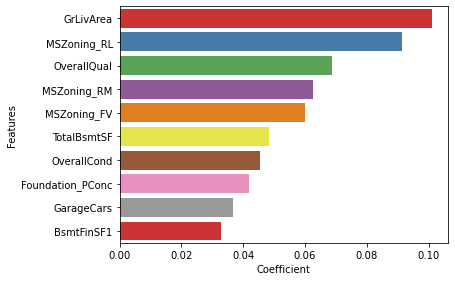

In [89]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

Lasso

In [71]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.077943,-0.084333,1
4,0.0005,-0.078070,-0.084335,2
2,0.0003,-0.077862,-0.084406,3
1,0.0002,-0.077800,-0.084470,4
0,0.0001,-0.077745,-0.084535,5
5,0.001,-0.078781,-0.084892,6
6,0.002,-0.079688,-0.085504,7
7,0.003,-0.080202,-0.085815,8
8,0.004,-0.080670,-0.086241,9
9,0.005,-0.081238,-0.086620,10


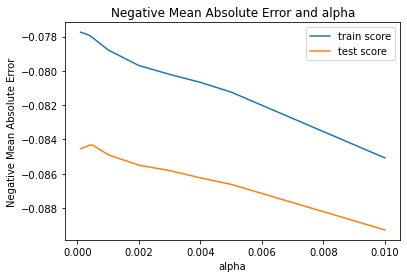

In [73]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0004)

In [75]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00548332,  0.02228792,  0.06961224,  0.04519401,  0.0331208 ,
        0.04778473,  0.10395177,  0.01108352,  0.00927825,  0.01761168,
        0.02145804,  0.03699341,  0.01010901, -0.01271519, -0.01963342,
        0.01247553,  0.01294495,  0.01779015,  0.01700082,  0.01582299,
        0.015179  , -0.01349465,  0.01433449,  0.06920015,  0.02748477,
        0.10896194,  0.07712516,  0.02515464, -0.01117302, -0.008115  ,
        0.02148954, -0.01493665, -0.00980429,  0.01648214, -0.00961753,
       -0.00127705, -0.00621804,  0.0112795 , -0.03333351, -0.03042434,
        0.        , -0.00492045, -0.01616428,  0.02554318,  0.01725   ,
        0.01950336,  0.04136755,  0.01725156,  0.00625964, -0.00869517])

In [76]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013451240117382529

In [77]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0055
1,LotArea,0.0223
2,OverallQual,0.0696
3,OverallCond,0.0452
4,BsmtFinSF1,0.0331
5,TotalBsmtSF,0.0478
6,GrLivArea,0.1040
7,BsmtFullBath,0.0111
8,FullBath,0.0093
9,HalfBath,0.0176


In [78]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.005483323810866019,
 'LotArea': 0.022287922228205827,
 'OverallQual': 0.06961223808437374,
 'OverallCond': 0.045194010864750035,
 'BsmtFinSF1': 0.03312079840889919,
 'TotalBsmtSF': 0.04778473209864098,
 'GrLivArea': 0.10395176778246702,
 'BsmtFullBath': 0.011083518879890189,
 'FullBath': 0.009278247384960588,
 'HalfBath': 0.017611676003212902,
 'Fireplaces': 0.02145803764422152,
 'GarageCars': 0.03699341316613113,
 'WoodDeckSF': 0.010109014402388691,
 'IsRemodelled': -0.01271518853378703,
 'Age': -0.019633421010916863,
 'GarageState': 0.01247552796295203,
 'd_BsmtQual': 0.012944950005569349,
 'd_BsmtExposure': 0.017790150456490135,
 'd_HeatingQC': 0.017000821357374674,
 'd_KitchenQual': 0.01582299052486314,
 'd_GarageFinish': 0.015178995026454074,
 'd_BldgType': -0.013494647038963095,
 'd_SaleCondition': 0.014334485877159544,
 'MSZoning_FV': 0.06920015183096734,
 'MSZoning_RH': 0.0274847675717867,
 'MSZoning_RL': 0.10896193651661329,
 'MSZoning_RM': 0.0771251559627254

In [79]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [80]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.108962
5,GrLivArea,True,1,0.103952
12,MSZoning_RM,True,1,0.077125
1,OverallQual,True,1,0.069612
9,MSZoning_FV,True,1,0.069200
4,TotalBsmtSF,True,1,0.047785
2,OverallCond,True,1,0.045194
14,Foundation_PConc,True,1,0.041368
7,GarageCars,True,1,0.036993
3,BsmtFinSF1,True,1,0.033121


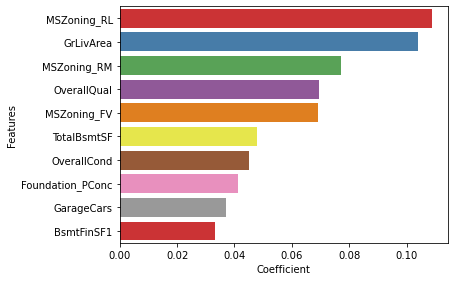

In [82]:
# bar plot to determine the variables that would affect pricing most using lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()